In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
data.head(5)

ID_code  target    var_0   var_1   ...     var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863   ...      7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473   ...      8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457   ...     -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518   ...     -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834   ...      3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]

In [4]:
# data


In [5]:
data = data.iloc[:, 1:]

In [6]:
data.head(5)

target    var_0   var_1    var_2   ...     var_196  var_197  var_198  var_199
0       0   8.9255 -6.7863  11.9081   ...      7.8784   8.5635  12.7803  -1.0914
1       0  11.5006 -4.1473  13.8588   ...      8.1267   8.7889  18.3560   1.9518
2       0   8.6093 -2.7457  12.0805   ...     -6.5213   8.2675  14.7222   0.3965
3       0  11.0604 -2.1518   8.9522   ...     -2.9275  10.2922  17.9697  -8.9996
4       0   9.8369 -1.4834  12.8746   ...      3.9267   9.5031  17.9974  -8.8104

[5 rows x 201 columns]

In [7]:
y = data['target']
# x.head(5)
x = data.iloc[:, 1:]
x.head(5)

var_0   var_1    var_2   var_3   ...     var_196  var_197  var_198  var_199
0   8.9255 -6.7863  11.9081  5.0930   ...      7.8784   8.5635  12.7803  -1.0914
1  11.5006 -4.1473  13.8588  5.3890   ...      8.1267   8.7889  18.3560   1.9518
2   8.6093 -2.7457  12.0805  7.8928   ...     -6.5213   8.2675  14.7222   0.3965
3  11.0604 -2.1518   8.9522  7.1957   ...     -2.9275  10.2922  17.9697  -8.9996
4   9.8369 -1.4834  12.8746  6.6375   ...      3.9267   9.5031  17.9974  -8.8104

[5 rows x 200 columns]

In [8]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [9]:
# import seaborn as sns

In [10]:
# sns.countplot(data['target'], label = 'Count')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

Light GBM

In [12]:
import lightgbm as lgb

from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [13]:

estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.664369	valid_0's l1: 0.181083	valid_0's binary_logloss: 0.325542
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.695195	valid_0's l1: 0.180409	valid_0's binary_logloss: 0.321889
[3]	valid_0's auc: 0.710502	valid_0's l1: 0.179742	valid_0's binary_logloss: 0.318798
[4]	valid_0's auc: 0.720239	valid_0's l1: 0.179123	valid_0's binary_logloss: 0.316319
[5]	valid_0's auc: 0.733102	valid_0's l1: 0.178451	valid_0's binary_logloss: 0.313677
[6]	valid_0's auc: 0.740377	valid_0's l1: 0.177814	valid_0's binary_logloss: 0.311388
[7]	valid_0's auc: 0.748107	valid_0's l1: 0.177248	valid_0's binary_logloss: 0.309414
[8]	valid_0's auc: 0.754737	valid_0's l1: 0.176569	valid_0's binary_logloss: 0.307199
[9]	valid_0's auc: 0.761904	valid_0's l1: 0.175947	valid_0's binary_logloss: 0.305145
[10]	valid_0's auc: 0.765788	valid_0's l1: 0.175334	valid_0's binary_logloss: 0.303401
[11]	valid_0's auc: 0.771484	valid_0's l1: 0.174727	valid_0's binary_logloss: 

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
# print('Best parameters found by grid search are:', gridsearch.best_params_)


In [15]:
gbm = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.67136	valid_0's l1: 0.180917	valid_0's binary_logloss: 0.324477
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.696238	valid_0's l1: 0.180219	valid_0's binary_logloss: 0.320706
[3]	valid_0's auc: 0.709064	valid_0's l1: 0.17954	valid_0's binary_logloss: 0.317632
[4]	valid_0's auc: 0.722674	valid_0's l1: 0.17883	valid_0's binary_logloss: 0.314809
[5]	valid_0's auc: 0.735559	valid_0's l1: 0.178086	valid_0's binary_logloss: 0.311843
[6]	valid_0's auc: 0.745622	valid_0's l1: 0.177335	valid_0's binary_logloss: 0.309218
[7]	valid_0's auc: 0.756753	valid_0's l1: 0.176634	valid_0's binary_logloss: 0.306547
[8]	valid_0's auc: 0.763523	valid_0's l1: 0.175969	valid_0's binary_logloss: 0.304397
[9]	valid_0's auc: 0.771376	valid_0's l1: 0.175256	valid_0's binary_logloss: 0.302054
[10]	valid_0's auc: 0.776145	valid_0's l1: 0.174586	valid_0's binary_logloss: 0.299945
[11]	valid_0's auc: 0.778943	valid_0's l1: 0.173887	valid_0's binary_logloss: 0.2

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

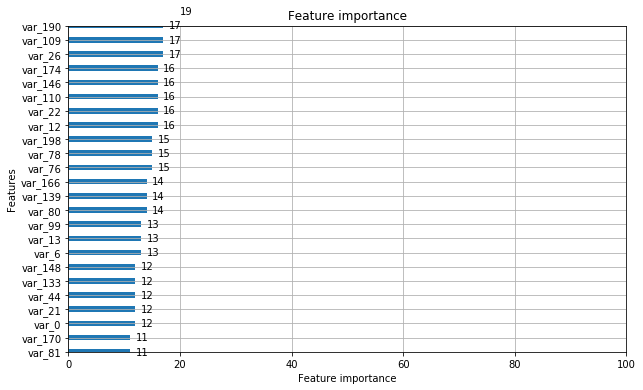

In [16]:
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [17]:
sorted(gbm.feature_importances_,reverse=True)


[19,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

5 0.85


In [19]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn import metrics

y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(metrics.roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.807321997010826


In [20]:
x = x.drop(['var_81','var_170','var_0','var_21','var_44','var_133'], axis=1)


In [21]:

# Remake our test/train set with our reduced dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)
print('Best parameters found by grid search are:', gridsearch.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.664894	valid_0's l1: 0.180125	valid_0's binary_logloss: 0.322299
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.692722	valid_0's l1: 0.179441	valid_0's binary_logloss: 0.31885
[3]	valid_0's auc: 0.705373	valid_0's l1: 0.178887	valid_0's binary_logloss: 0.316194
[4]	valid_0's auc: 0.718106	valid_0's l1: 0.178259	valid_0's binary_logloss: 0.313419
[5]	valid_0's auc: 0.729961	valid_0's l1: 0.177591	valid_0's binary_logloss: 0.310856
[6]	valid_0's auc: 0.741051	valid_0's l1: 0.177021	valid_0's binary_logloss: 0.308509
[7]	valid_0's auc: 0.74516	valid_0's l1: 0.176501	valid_0's binary_logloss: 0.306736
[8]	valid_0's auc: 0.750871	valid_0's l1: 0.175949	valid_0's binary_logloss: 0.30468
[9]	valid_0's auc: 0.756371	valid_0's l1: 0.175397	valid_0's binary_logloss: 0.302697
[10]	valid_0's auc: 0.762952	valid_0's l1: 0.174879	valid_0's binary_logloss: 0.300896
[11]	valid_0's auc: 0.767622	valid_0's l1: 0.17438	valid_0's binary_logloss: 0.29

In [22]:
gbm = lgb.LGBMClassifier(learning_rate = 0.1, metric = 'l1', 
                        n_estimators = 20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.66837	valid_0's l1: 0.180183	valid_0's binary_logloss: 0.322473
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.689045	valid_0's l1: 0.179563	valid_0's binary_logloss: 0.319382
[3]	valid_0's auc: 0.706076	valid_0's l1: 0.179021	valid_0's binary_logloss: 0.316632
[4]	valid_0's auc: 0.718671	valid_0's l1: 0.178413	valid_0's binary_logloss: 0.31403
[5]	valid_0's auc: 0.732125	valid_0's l1: 0.177868	valid_0's binary_logloss: 0.311559
[6]	valid_0's auc: 0.738593	valid_0's l1: 0.177371	valid_0's binary_logloss: 0.309574
[7]	valid_0's auc: 0.743829	valid_0's l1: 0.176934	valid_0's binary_logloss: 0.307865
[8]	valid_0's auc: 0.750469	valid_0's l1: 0.176388	valid_0's binary_logloss: 0.305952
[9]	valid_0's auc: 0.757182	valid_0's l1: 0.175894	valid_0's binary_logloss: 0.304215
[10]	valid_0's auc: 0.761462	valid_0's l1: 0.175424	valid_0's binary_logloss: 0.30251
[11]	valid_0's auc: 0.765595	valid_0's l1: 0.174967	valid_0's binary_logloss: 0.3

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [23]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.89945
The roc_auc_score of prediction is: 0.5
The null acccuracy is: 0.89945


In [24]:
# X_test[:,1]

In [25]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
y_pred_prob


array([0.14678418, 0.09332864, 0.14958982, ..., 0.10777374, 0.10838457,
       0.05847039])

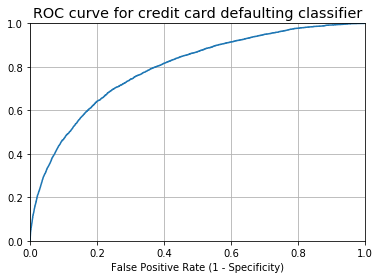

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for credit card defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [27]:

auc_roc_1 = str(metrics.roc_auc_score(y_test, y_pred_prob))
print('AUC with dimensionality reduction: \n' + auc_roc_1)
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC with dimensionality reduction: 
0.7956876873675965
AUC without dimensionality reduction: 
0.807321997010826


In [28]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[35978     0]
 [ 4022     0]]


In [29]:
test = pd.read_csv('../input/test.csv')
# test.head()

test = test.iloc[:, 1:]
# test.head(5)
# test.shape
test = test.drop(['var_81','var_170','var_0','var_21','var_44','var_133'], axis=1)
# test.shape


In [30]:
# predictions = np.zeros(len(data["target"]))

predictions = gbm.predict_proba(test)[:,1]
new = pd.read_csv('../input/test.csv')
new = new['ID_code']
# new.head(5)
# predictions.head(5)

In [31]:
# predictions

In [32]:
submission = pd.DataFrame({"ID_code": new, "target": predictions})
# submission = pd.DataFrame({"ID_code": test.Id, "target": redictions})
# submission["target"] = predictions
submission.to_csv("submission.csv", index=False)

In [33]:
submission.head(5)

ID_code    target
0  test_0  0.147581
1  test_1  0.140775
2  test_2  0.145003
3  test_3  0.067591
4  test_4  0.091810